In [1]:
import numpy as np
import scipy.special as ssp
import matplotlib.pyplot as plt

In [2]:
input_nodes=784 # 输入层节点数
hide_nodes=200 # 隐藏层节点数,理论上越高越好，但是高到一定程度就到顶了（默认：200）
out_nodes=10  # 输出层节点数
learningrate = 0.1 #学习率

(array([[ 0.,  1.,  7., ..., 13.,  0.,  0.],
        [ 0.,  0.,  5., ..., 12.,  1.,  0.],
        [ 0.,  0.,  4., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  7., ...,  8.,  0.,  0.],
        [ 0.,  0.,  6., ..., 10.,  0.,  0.],
        [ 0.,  1.,  6., ...,  4.,  0.,  0.]]),
 array([-0.31706046, -0.25531538, -0.19357031, -0.13182523, -0.07008016,
        -0.00833508,  0.05340999,  0.11515507,  0.17690014,  0.23864522,
         0.30039029]),
 <a list of 784 BarContainer objects>)

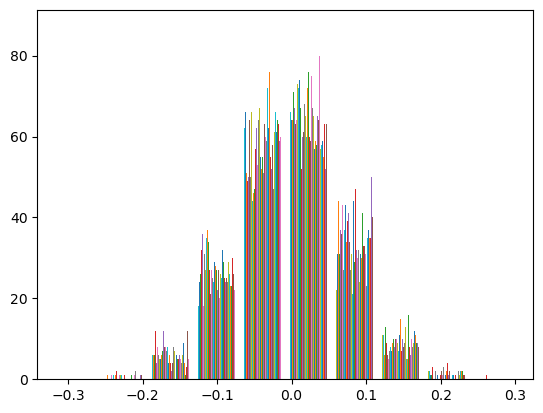

In [3]:
wih = np.random.normal(0.0, pow(hide_nodes, -0.5), (hide_nodes, input_nodes)) #矩阵大小为隐藏层节点数×输入层节点数
#np.random.normal()的意思是一个正态分布，normal这里是正态的意思
plt.hist(wih)

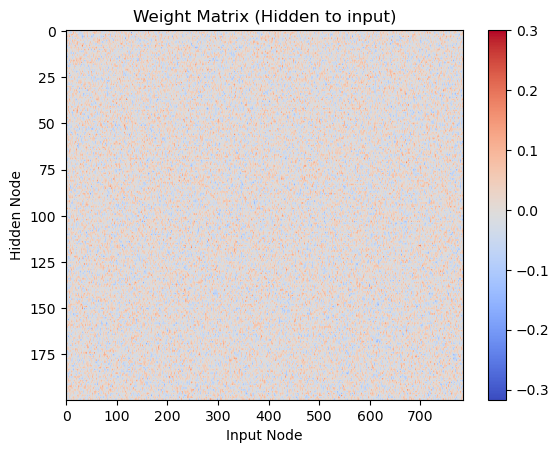

In [4]:
# Visualize weight matrix wih
plt.imshow(wih, cmap='coolwarm', aspect='auto')
#plt.imshow(wih, cmap='hot', aspect='auto')
plt.xlabel('Input Node')
plt.ylabel('Hidden Node')
plt.title('Weight Matrix (Hidden to input)')
plt.colorbar()
plt.show()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 2., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]),
 array([-2.41392316e-01, -1.93074206e-01, -1.44756096e-01, -9.64379862e-02,
        -4.81198762e-02,  1.98233858e-04,  4.85163439e-02,  9.68344539e-02,
         1.45152564e-01,  1.93470674e-01,  2.41788784e-01]),
 <a list of 200 BarContainer objects>)

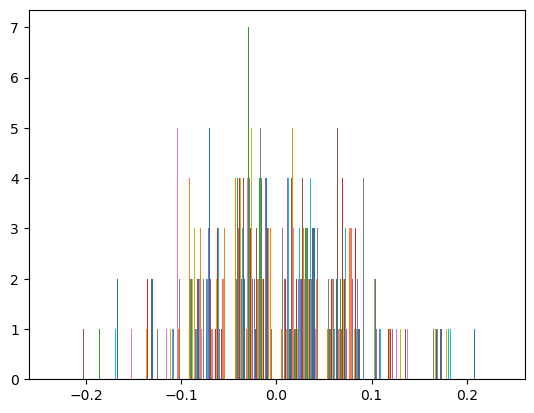

In [5]:
who = np.random.normal(0.0, pow(hide_nodes, -0.5), (out_nodes, hide_nodes)) #矩阵大小为输出层节点数×隐藏层节点数
plt.hist(who)
#同上

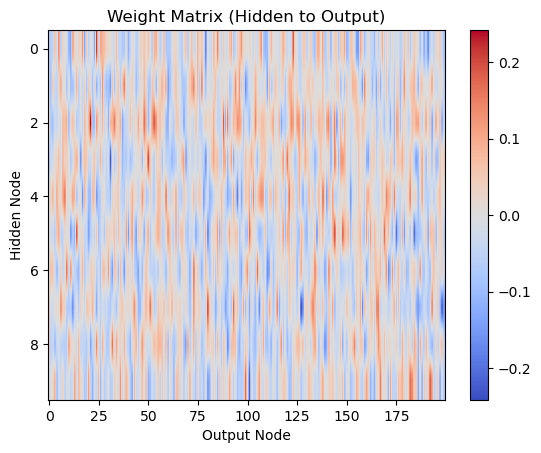

In [6]:
# Visualize weight matrix who
plt.imshow(who, cmap='coolwarm', aspect='auto')
plt.xlabel('Output Node')
plt.ylabel('Hidden Node')
plt.title('Weight Matrix (Hidden to Output)')
plt.colorbar()
plt.show()

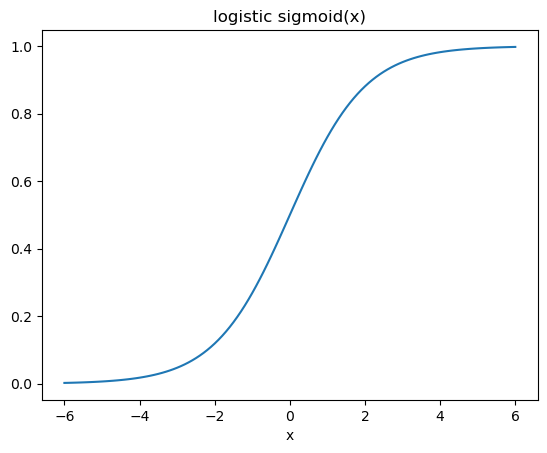

In [7]:
#linspace 参考:https://blog.csdn.net/neweastsun/article/details/99676029
x = np.linspace(start=-6, stop=6, num=121) #从-6到6范围内创建121个距离相近的数字，从而生成x数组用于代入后面的y
'''
e.g.
x = np.linspace(start = 0, stop = 100, num = 5) ##从0到100范围内创建5个距离相近的数字
print(x)
OUT：[  0.  25.  50.  75. 100.]

#lambda示例
#lambda arg1,arg2,arg3… :<表达式>
func=lambda x : x+1  #func=x+1    
print(func(2)) #func=2+1=3
func=lambda x,y : x+y #func=x+y
print(func(1,2)) #func=1+2=3
'''
activation_function = lambda x: ssp.expit(x)   #logistic sigmoid函数，定义为expit（x）= 1 /（1 + exp（-x））
y = activation_function(x)
plt.plot(x, y)
plt.xlabel('x')
plt.title('logistic sigmoid(x)')
plt.show()

In [8]:
#数据集分为训练集和测试集，训练集有60000条数据，测试集有10000条数据，
#每一条数据都是由785个数字组成，数值大小在0~255之间，第一个数字代表该条数据所表示的数字，
#后面的784个数字可以形成28×28的矩阵(28x28=784)，每一个数值都对应该位置的像素点的像素值灰度大小，由此形成了一幅像素为28×28的图片。

#这里是训练集

test_data_file = open("mnist_train.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
print("总数据量:",len(test_data_list))
print("第1条数据：",test_data_list[0])
print("第1条数据表示的数字：",test_data_list[0][0])
print("第1条数据的28x28矩阵数据:",test_data_list[0][1:])

总数据量: 60000
第1条数据： 5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,

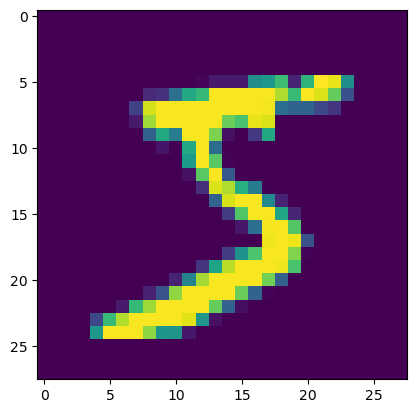

In [9]:
all_values = test_data_list[0].split(',') # split()函数将第1条数据进行拆分，以‘，’为分界点进行拆分
image_array = np.asfarray(all_values[1:]).reshape((28,28)) # asfarray()函数将all_values中的后784个数字进行重新排列
# reshape()函数可以对数组进行整型，使其成为28×28的二维数组，asfarry()函数可以使其成为矩阵。
plt.imshow(image_array, interpolation = 'nearest')  # imshow()函数可以将28×28的矩阵中的数值当做像素值，使其形成图片

In [10]:
#接下去是第1层和最后1层的逻辑

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

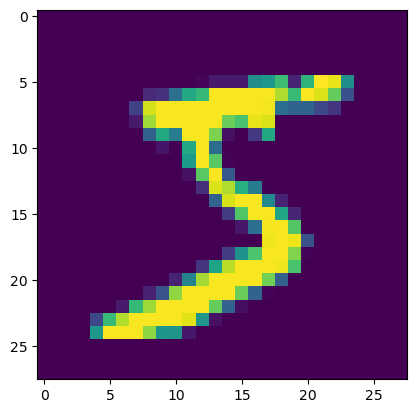

In [11]:
# 对输入的数据进行处理，取后784个数据除以255，再乘以0.99，最后加上0。01，是所有的数据都在0.01到1.00之间
inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 #输入层，784个输入
# 建立准确输出结果矩阵，对应的位置标签数值为0.99，其他位置为0.01
#最终实现将0～255转换为0～1的浮点数
#可视化中间输出
print(inputs)
middle_layer_fig = np.asfarray((inputs-0.01)/0.99*255.0 )  
middle_layer_fig = np.asfarray(middle_layer_fig).reshape((28,28))
plt.imshow(middle_layer_fig, interpolation = 'nearest')  

10
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


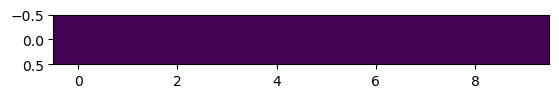

In [12]:
targets = np.zeros(out_nodes) + 0.01 
#输出层，10个数字，10个输出，0～1的概率范围
#输出层是1个list,由10个数字组成，第一个数字代表0的概率，依次类推，第10个数字代表9的概率
#这里是输出的[理想结果]
# all_values[0] is the target label for this record
#可视化中间输出
print(len(targets))
print(targets)
middle_layer_fig = np.asfarray((targets-0.01)/0.99*255.0 )  
middle_layer_fig = np.asfarray(middle_layer_fig).reshape((1,10))
plt.imshow(middle_layer_fig, interpolation = 'nearest')  

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


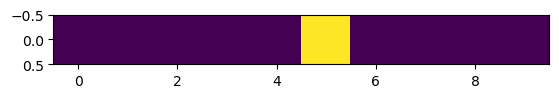

In [13]:
#print("第1行数据：",all_values)
#print("第1行数据所表示的数字：",all_values[0])
targets[int(all_values[0])] = 0.99 
#将数据集的数据表示的数字在其指定的输出层的概率位置上的概率置0.99
#这里是第1行数据，对应的是数组5，因此按照其在输出层的表示的概率位置，应当将第6个数字改为0.99
#可视化中间输出
print(targets)
middle_layer_fig = np.asfarray((targets-0.01)/0.99*255.0 )  
middle_layer_fig = np.asfarray(middle_layer_fig).reshape((1,10))
plt.imshow(middle_layer_fig, interpolation = 'nearest')  

In [14]:
#对比
targets = np.zeros(out_nodes) + 0.01 
print(targets)
targets[int(all_values[0])] = 0.99 
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


In [15]:
#接下去是训练逻辑，训练的目标就是让输入的数据的概率尽可能接近理想结果

In [16]:
# 将导入的输入列表数据和正确的输出结果转换成二维矩阵
INPUT = np.array(inputs, ndmin = 2).T # array函数是矩阵生成函数，将输入的inputs转换成二维矩阵，ndmin=2表示二维矩阵
TARGETS = np.array(targets, ndmin = 2).T # .T表示矩阵的转置，生成后的矩阵的转置矩阵送入变量targets
#print(INPUT)
#print(TARGETS)

[[ 0.62742592  0.77746089 -0.68135349 -0.22043294 -0.56110099 -0.71422988
   0.88219265  1.28689731  0.59035343  0.30161286  0.02862082  0.95778623
   0.71702757  0.31219352 -0.19603236 -0.28651111  0.67706301  0.61026297
   0.61539435  0.19152953 -0.32365858  0.1597388   0.60678042 -0.10563369
  -0.80571966 -0.30963654  0.76215342 -0.26615336 -0.14580916 -0.23062058
   0.15640816 -0.11570625 -0.35688729  0.5255774  -0.76989707 -0.53404874
   0.64712862 -0.19306028  0.03668149  0.29978147 -0.1207234  -1.40695141
   0.31282916  0.09409082 -0.15739274 -0.23741574 -1.15404387  0.3090253
   1.15288363  0.75146675  0.02923698  0.82094591  0.55265504 -0.1336943
   0.84995026 -0.45787535  0.2773476  -0.05990327 -0.62733937 -0.12077553
   0.59981384  0.16878511  1.18606195 -0.3032395   0.38946519 -0.15965825
   0.68981751 -1.0182492   0.5055957  -0.7567347  -0.2934566  -0.85105809
   0.64920205 -0.3046666   0.31899522  0.65911153 -0.22932595  1.26614823
   1.65772871  0.39931287  0.41847866  0

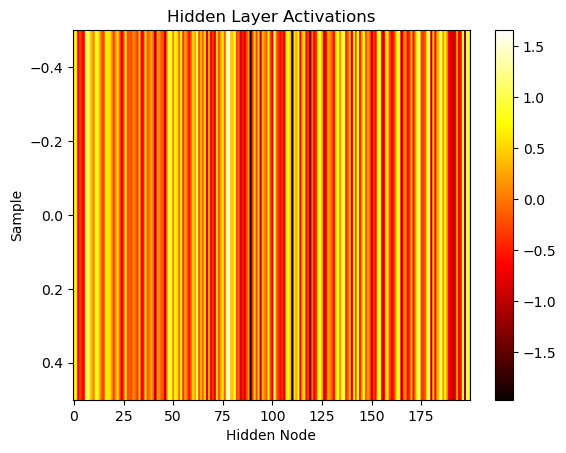

In [17]:
# 进行前向传播
# 利用导入的数据计算进入隐藏层的数据
hidden_inputs = np.dot(wih, INPUT) # dot()函数是指两个矩阵做点乘
#可视化中间输出
print(hidden_inputs.T)
# Visualize hidden layer activations
#hidden_inputs = hidden_inputs.reshape((20, 10))
plt.imshow(hidden_inputs.T, cmap='hot', aspect='auto')
plt.xlabel('Hidden Node')
plt.ylabel('Sample')
plt.title('Hidden Layer Activations')
plt.colorbar()
plt.show()

[[0.65190557 0.68513262 0.33595928 0.44511383 0.36329275 0.32866487
  0.70727639 0.78362156 0.64344624 0.57483675 0.50715472 0.72267835
  0.67195213 0.57742058 0.45114825 0.42885822 0.66308288 0.64800079
  0.64917034 0.54773654 0.41978438 0.53985    0.64720602 0.47361611
  0.30880336 0.42320346 0.68182108 0.43385168 0.46361216 0.44259904
  0.53902252 0.47110567 0.41171327 0.62845102 0.31650137 0.36957308
  0.65636311 0.45188428 0.50916935 0.57438909 0.46985575 0.19671535
  0.57757568 0.52350537 0.46073284 0.4409233  0.23975123 0.57664733
  0.76003723 0.67949821 0.50730873 0.69443709 0.63475136 0.46662612
  0.70055671 0.38748997 0.56889583 0.48502866 0.34811407 0.46984277
  0.64561372 0.54209639 0.76603601 0.42476575 0.59615395 0.46017001
  0.66592633 0.26536858 0.62377344 0.31935562 0.42715785 0.29921095
  0.65683062 0.42441709 0.57907936 0.65906078 0.44291845 0.78008268
  0.83993287 0.59852256 0.60311915 0.72281391 0.42409923 0.48223643
  0.28913433 0.38402087 0.30634925 0.42573646 0.

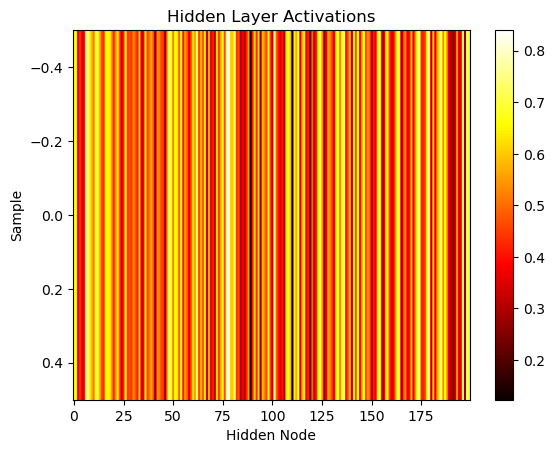

In [18]:
# 利用激活函数sigmoid计算隐藏层输出的数据
hidden_outputs = activation_function(hidden_inputs)
#可视化中间输出
print(hidden_outputs.T)
# Visualize hidden layer activations
plt.imshow(hidden_outputs.T, cmap='hot', aspect='auto')
plt.xlabel('Hidden Node')
plt.ylabel('Sample')
plt.title('Hidden Layer Activations')
plt.colorbar()
plt.show()

[[-0.11497729 -0.12837015  1.50840729 -0.38858294  0.60139097 -0.57608214
  -0.73746407 -0.43590913 -0.40828794 -0.77577995]]


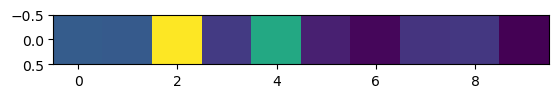

In [19]:
# 利用隐藏层输出的数据计算导入输出层的数据
final_inputs = np.dot(who, hidden_outputs) # dot()函数是指两个矩阵做点乘
#可视化中间输出
print(final_inputs.T)
middle_layer_fig = np.asfarray((final_inputs-0.01)/0.99*255.0 )  
middle_layer_fig = np.asfarray(middle_layer_fig).reshape((1,10))
plt.imshow(middle_layer_fig, interpolation = 'nearest')

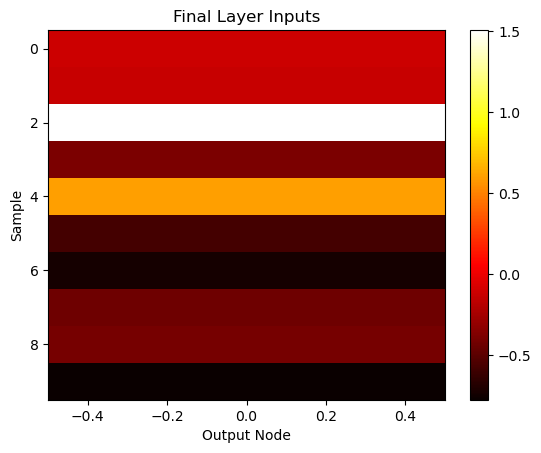

In [20]:
# Or visualize final outputs as a heatmap
plt.imshow(final_inputs, cmap='hot', aspect='auto')
plt.xlabel('Output Node')
plt.ylabel('Sample')
plt.title('Final Layer Inputs')
plt.colorbar()
plt.show()

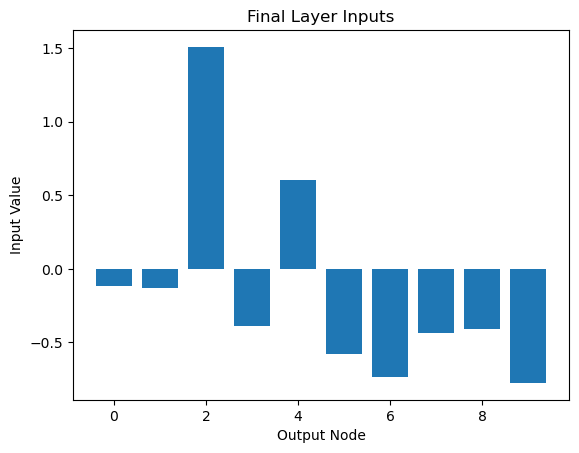

In [21]:
# Visualize final layer inputs
plt.bar(range(out_nodes), final_inputs.flatten())
plt.xlabel('Output Node')
plt.ylabel('Input Value')
plt.title('Final Layer Inputs')
plt.show()

[[0.4712873  0.46795146 0.81882505 0.40405848 0.64597447 0.35983459
  0.32355893 0.39271617 0.39932271 0.31523012]]


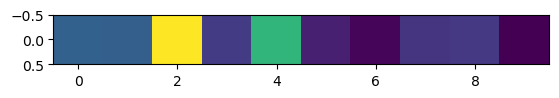

In [22]:
# 利用激活函数sigmoid计算输出层的输出结果
final_outputs = activation_function(final_inputs)
# 前向传播结束

#可视化中间输出
print(final_outputs.T)
middle_layer_fig = np.asfarray((final_outputs-0.01)/0.99*255.0 )  
middle_layer_fig = np.asfarray(middle_layer_fig).reshape((1,10))
plt.imshow(middle_layer_fig, interpolation = 'nearest') 

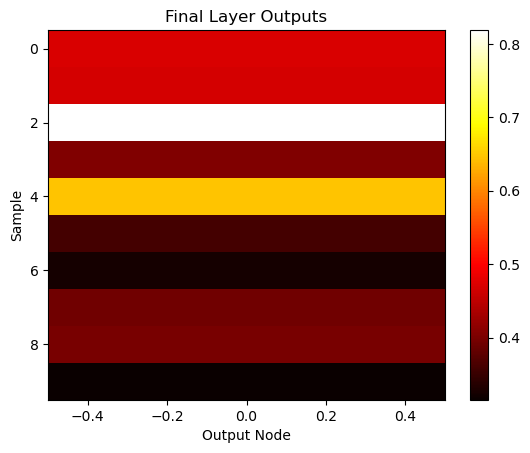

In [23]:
# Or visualize final outputs as a heatmap
plt.imshow(final_outputs, cmap='hot', aspect='auto')
plt.xlabel('Output Node')
plt.ylabel('Sample')
plt.title('Final Layer Outputs')
plt.colorbar()
plt.show()

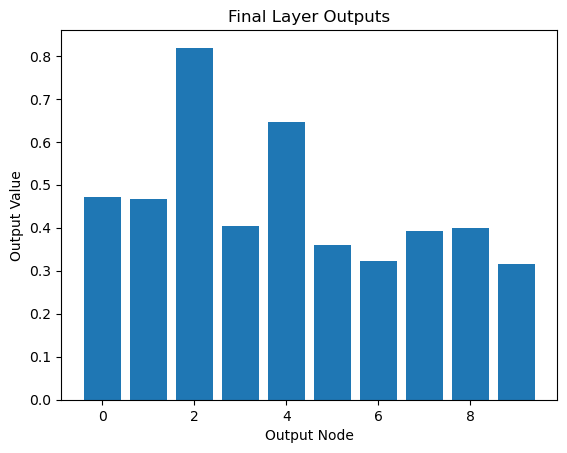

In [24]:
# Visualize final layer outputs （sigmoid）
plt.bar(range(out_nodes), final_outputs.flatten())
plt.xlabel('Output Node')
plt.ylabel('Output Value')
plt.title('Final Layer Outputs')
plt.show()

[[-0.4612873  -0.45795146 -0.80882505 -0.39405848 -0.63597447  0.63016541
  -0.31355893 -0.38271617 -0.38932271 -0.30523012]]


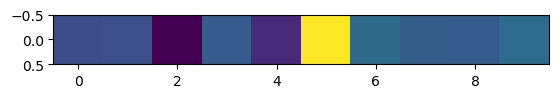

In [25]:
# 进行反向传播
# 计算前向传播得到的输出结果与正确值之间的误差
output_errors = TARGETS - final_outputs

#可视化中间输出
print(output_errors.T)
middle_layer_fig = np.asfarray((output_errors-0.01)/0.99*255.0 )  
middle_layer_fig = np.asfarray(middle_layer_fig).reshape((1,10))
plt.imshow(middle_layer_fig, interpolation = 'nearest')  

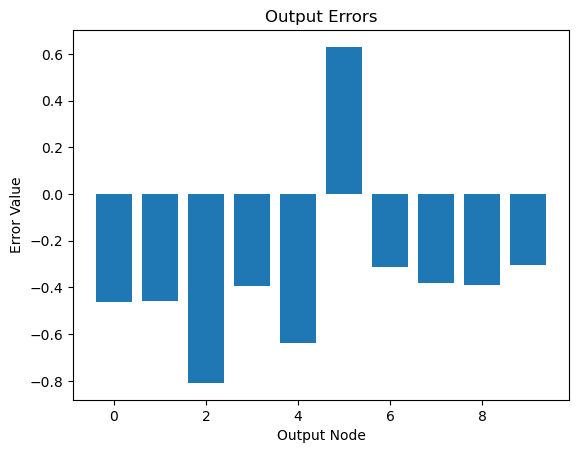

In [26]:
# Visualize output errors as a bar chart
plt.bar(range(out_nodes), output_errors.flatten())
plt.xlabel('Output Node')
plt.ylabel('Error Value')
plt.title('Output Errors')
plt.show()

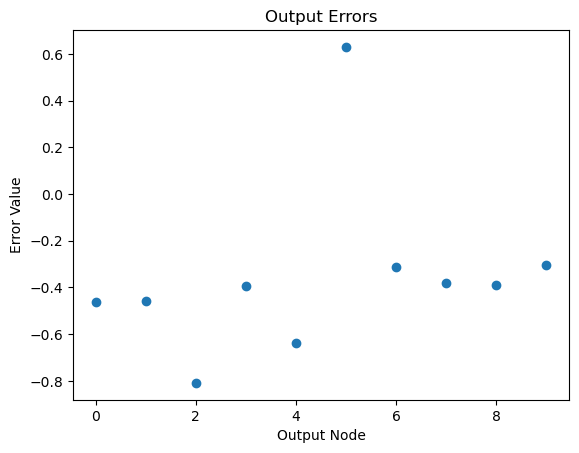

In [27]:
# Or visualize output errors as a scatter plot
plt.scatter(range(out_nodes), output_errors.flatten())
plt.xlabel('Output Node')
plt.ylabel('Error Value')
plt.title('Output Errors')
plt.show()

In [28]:
# 隐藏层的误差是由输出层的误差通过两个层之间的权重矩阵进行分配的，在隐藏层重新结合

In [29]:
hidden_errors = np.dot(who.T, output_errors) # 隐藏层与输出层之间的权重矩阵的转置与前向传播的误差矩阵的点乘
#可视化中间输出
print(hidden_errors.T)
#middle_layer_fig = np.asfarray((hidden_errors-0.01)/0.99*255.0 )  
#middle_layer_fig = np.asfarray(middle_layer_fig).reshape((20,10))
#plt.imshow(middle_layer_fig, interpolation = 'nearest')  

[[ 0.00760516  0.1244399   0.00961455 -0.02305118  0.10083668 -0.03422237
  -0.0597816  -0.20113576 -0.12875934 -0.06072146  0.15568764 -0.02623229
  -0.08263598 -0.16744453  0.21814333  0.04038457  0.046955    0.10834688
  -0.06639181  0.02060788 -0.12282559 -0.11042752  0.05394971  0.03838095
   0.02436151 -0.00545735  0.07632781 -0.21073484 -0.00935069  0.13582302
   0.18091287  0.22091301 -0.10329392 -0.02316549 -0.15546451 -0.00239208
  -0.09860012  0.17315694  0.06507147  0.08199764  0.01285515  0.07233263
   0.05602818 -0.15197788 -0.01979846  0.1134661   0.01572567 -0.09217819
  -0.34263701 -0.08930606  0.15323652 -0.08043624 -0.06424864 -0.11061822
  -0.06914468 -0.09524854 -0.08258073 -0.09642535 -0.0933724   0.00386937
   0.35118941  0.11679446  0.02932927  0.09002772 -0.06962973 -0.07545577
   0.13530685  0.10858556  0.13900306  0.06380169  0.01520522  0.02848804
  -0.03701204 -0.19731726 -0.03857571 -0.1762296   0.04590791  0.0366466
   0.14929734  0.23901074 -0.18072353  

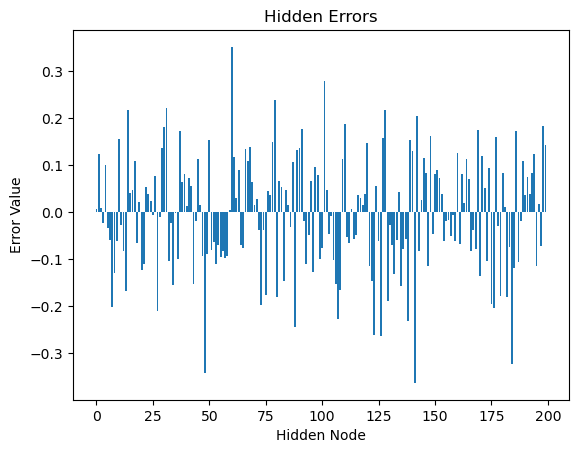

In [30]:
# Visualize hidden errors as a bar chart
plt.bar(range(hide_nodes), hidden_errors.flatten())
plt.xlabel('Hidden Node')
plt.ylabel('Error Value')
plt.title('Hidden Errors')
plt.show()

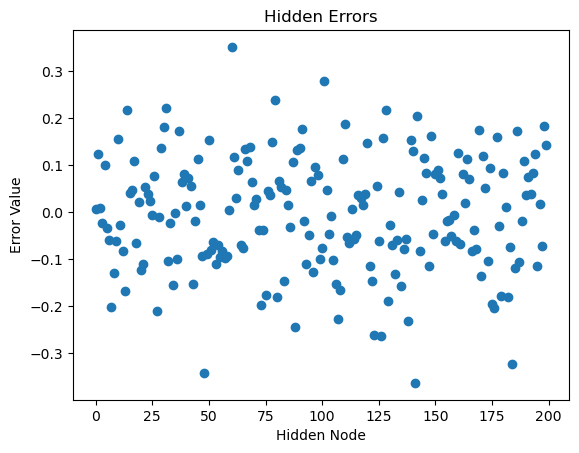

In [31]:
# Or visualize hidden errors as a scatter plot
plt.scatter(range(hide_nodes), hidden_errors.flatten())
plt.xlabel('Hidden Node')
plt.ylabel('Error Value')
plt.title('Hidden Errors')
plt.show()

In [32]:
# 对隐藏层与输出层之间的权重矩阵进行更新迭代
who += learningrate * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),np.transpose(hidden_outputs))
# 对输入层与隐藏层之间的权重矩阵进行更新迭代
wih += learningrate * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(INPUT))

In [33]:
#第一次迭代训练结束
print(wih)
print(who)

[[ 0.06470563  0.00860869  0.03706958 ... -0.07245673 -0.09482279
   0.07720373]
 [ 0.09600831 -0.06567842 -0.13673136 ...  0.01675536  0.14206223
   0.03304758]
 [ 0.03498046 -0.02797632 -0.02082725 ...  0.09524795  0.03684833
   0.02350262]
 ...
 [-0.07221947  0.11123959 -0.01464175 ... -0.05566633  0.09706155
   0.03306409]
 [-0.07071521  0.0162904   0.04383193 ...  0.03142195  0.07375656
   0.04643288]
 [ 0.11010373 -0.15243087 -0.00982105 ...  0.09385473  0.03970068
  -0.07477574]]
[[-0.06024262 -0.070733   -0.05731835 ...  0.05767553 -0.04859921
  -0.09257545]
 [-0.04200404 -0.10040945  0.05782651 ...  0.01853338 -0.00149259
  -0.06632205]
 [ 0.0415524  -0.08387879 -0.09120586 ...  0.08379909 -0.14920489
  -0.03743324]
 ...
 [ 0.0579135  -0.03471868 -0.0280975  ... -0.10427744 -0.22605641
  -0.1542508 ]
 [ 0.06272237 -0.07101399 -0.03302829 ...  0.01981257  0.06899284
  -0.06444205]
 [-0.01793548 -0.00729261  0.01762964 ... -0.14145688 -0.0044156
  -0.07737687]]


[[ 0.06470563  0.00860869  0.03706958 ... -0.07245673 -0.09482279
   0.07720373]
 [ 0.09600831 -0.06567842 -0.13673136 ...  0.01675536  0.14206223
   0.03304758]
 [ 0.03498046 -0.02797632 -0.02082725 ...  0.09524795  0.03684833
   0.02350262]
 ...
 [-0.07221947  0.11123959 -0.01464175 ... -0.05566633  0.09706155
   0.03306409]
 [-0.07071521  0.0162904   0.04383193 ...  0.03142195  0.07375656
   0.04643288]
 [ 0.11010373 -0.15243087 -0.00982105 ...  0.09385473  0.03970068
  -0.07477574]]


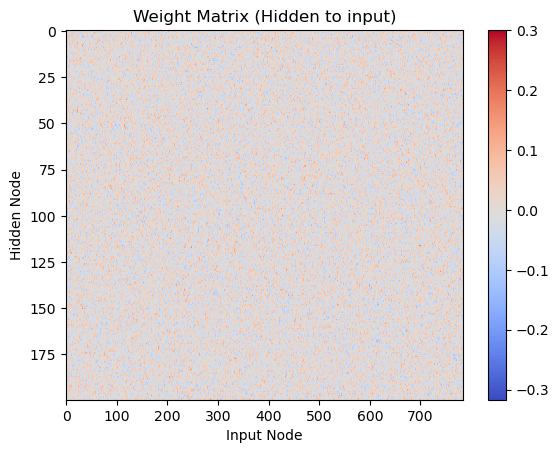

In [34]:
print(wih)
# Visualize weight matrix wih
plt.imshow(wih, cmap='coolwarm', aspect='auto')
plt.xlabel('Input Node')
plt.ylabel('Hidden Node')
plt.title('Weight Matrix (Hidden to input)')
plt.colorbar()
plt.show()

[[-0.06024262 -0.070733   -0.05731835 ...  0.05767553 -0.04859921
  -0.09257545]
 [-0.04200404 -0.10040945  0.05782651 ...  0.01853338 -0.00149259
  -0.06632205]
 [ 0.0415524  -0.08387879 -0.09120586 ...  0.08379909 -0.14920489
  -0.03743324]
 ...
 [ 0.0579135  -0.03471868 -0.0280975  ... -0.10427744 -0.22605641
  -0.1542508 ]
 [ 0.06272237 -0.07101399 -0.03302829 ...  0.01981257  0.06899284
  -0.06444205]
 [-0.01793548 -0.00729261  0.01762964 ... -0.14145688 -0.0044156
  -0.07737687]]


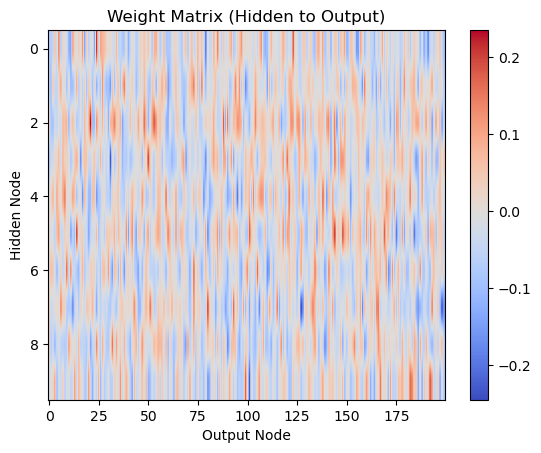

In [35]:
print(who)
# Visualize weight matrix who
plt.imshow(who, cmap='coolwarm', aspect='auto')
plt.xlabel('Output Node')
plt.ylabel('Hidden Node')
plt.title('Weight Matrix (Hidden to Output)')
plt.colorbar()
plt.show()

In [36]:
#完整训练流程

epochs start: 0
epochs start: 1
epochs start: 2
epochs start: 3
epochs start: 4


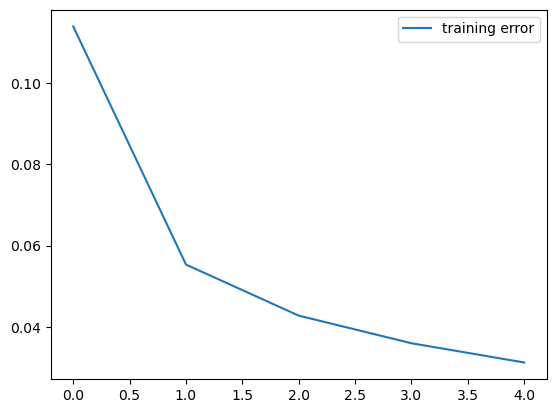

In [37]:
input_nodes=784 # 输入层节点数
hide_nodes=200 # 隐藏层节点数
out_nodes=10  # 输出层节点数
learningrate = 0.1 #学习率
train_errors = []
epochs=5

wih = np.random.normal(0.0, pow(hide_nodes, -0.5), (hide_nodes, input_nodes)) #矩阵大小为隐藏层节点数×输入层节点数
#np.random.normal()的意思是一个正态分布，normal这里是正态的意思
who = np.random.normal(0.0, pow(hide_nodes, -0.5), (out_nodes, hide_nodes)) #矩阵大小为输出层节点数×隐藏层节点数
activation_function = lambda x: ssp.expit(x)   #结合上述所学，这里写一段原理是logistic sigmoid的激活函数

test_data_file = open("mnist_train.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

for e in range(epochs):
    # go through all records in the training data set
    # 遍历所有输入的数据
    print('epochs start:',e)
     # 计算训练集上的误差
    train_error = 0.0
    for record in test_data_list:
        all_values = record.split(',') # split()函数将第1条数据进行拆分，以‘，’为分界点进行拆分
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 #输入层，784个输入
        targets = np.zeros(out_nodes) + 0.01 
        targets[int(all_values[0])] = 0.99 
        INPUT = np.array(inputs, ndmin = 2).T # array函数是矩阵生成函数，将输入的inputs转换成二维矩阵，ndmin=2表示二维矩阵
        TARGETS = np.array(targets, ndmin = 2).T # .T表示矩阵的转置，生成后的矩阵的转置矩阵送入变量targets
        # 进行前向传播
        # 利用导入的数据计算进入隐藏层的数据
        hidden_inputs = np.dot(wih, INPUT) # dot()函数是指两个矩阵做点乘
        # 利用激活函数sigmoid计算隐藏层输出的数据
        hidden_outputs = activation_function(hidden_inputs)
        # 利用隐藏层输出的数据计算导入输出层的数据
        final_inputs = np.dot(who, hidden_outputs) # dot()函数是指两个矩阵做点乘
        # 利用激活函数sigmoid计算输出层的输出结果
        final_outputs = activation_function(final_inputs)
        # 前向传播结束
        # 进行反向传播
        # 计算前向传播得到的输出结果与正确值之间的误差
        output_errors = TARGETS - final_outputs
        # 隐藏层的误差是由输出层的误差通过两个层之间的权重矩阵进行分配的，在隐藏层重新结合
        hidden_errors = np.dot(who.T, output_errors) # 隐藏层与输出层之间的权重矩阵的转置与前向传播的误差矩阵的点乘
        # 对隐藏层与输出层之间的权重矩阵进行更新迭代
        who += learningrate * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),np.transpose(hidden_outputs))
        # 对输入层与隐藏层之间的权重矩阵进行更新迭代
        wih += learningrate * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(INPUT))
        train_error += np.sum((output_errors) ** 2)
    train_error /= len(test_data_list)
    train_errors.append(train_error)

# 画出误差曲线
plt.plot(train_errors, label='training error')
plt.legend()
plt.show()

In [38]:
#最终结果,这两个变量就是最终的权重(weights)
print(who)
print(wih)
final_who=who
final_wih=wih

[[ 0.09131061 -0.48510687  0.10479328 ... -0.21794217 -0.22098956
  -0.17485843]
 [-0.11913623 -1.13824358 -1.28836758 ...  0.06784648 -0.70961194
   0.58799251]
 [ 0.48363482 -1.49603442  1.36704904 ... -0.14185296 -0.25951289
   0.678326  ]
 ...
 [-1.39877274 -1.34313229 -0.48648912 ... -0.05585008 -0.99089088
   0.11676437]
 [-0.72045019 -0.1272162  -1.0153721  ...  0.19651617 -0.4718097
  -0.77392804]
 [ 0.2622835  -0.67304906  0.71250956 ...  0.07496543 -0.26312731
   0.47776201]]
[[-0.03112954 -0.06715899  0.0329559  ... -0.10753007  0.01542881
  -0.10759573]
 [-0.00922246  0.0467332   0.01244478 ... -0.03624585  0.09490112
   0.12295545]
 [-0.09411268 -0.00750509 -0.14391657 ...  0.07583427 -0.08377415
   0.05397556]
 ...
 [-0.11216848 -0.11317395  0.00326044 ...  0.02460078  0.08408427
  -0.04049486]
 [-0.09478847 -0.17024348 -0.0162363  ... -0.07392693  0.10881128
   0.05448746]
 [-0.03729412  0.12759273 -0.00788158 ...  0.00075066 -0.05943585
   0.01038822]]


In [39]:
#保存权重
np.save("weights", final_who)
np.save("weights02",final_wih)

In [40]:
#测试

In [41]:
#加载权重文件(weights)
final_who=np.load("weights.npy")
final_wih=np.load("weights02.npy")

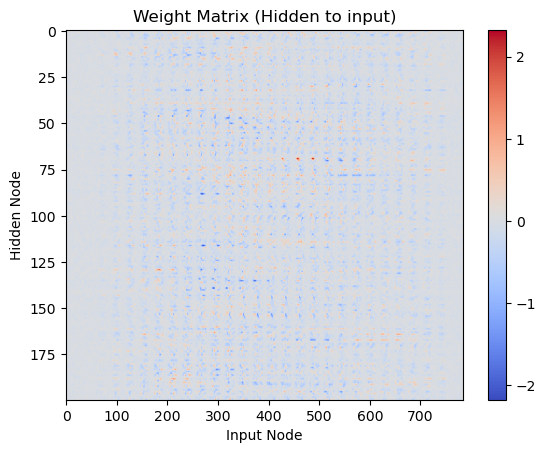

In [42]:
# Visualize weight matrix wih
plt.imshow(final_wih, cmap='coolwarm', aspect='auto')
plt.xlabel('Input Node')
plt.ylabel('Hidden Node')
plt.title('Weight Matrix (Hidden to input)')
plt.colorbar()
plt.show()

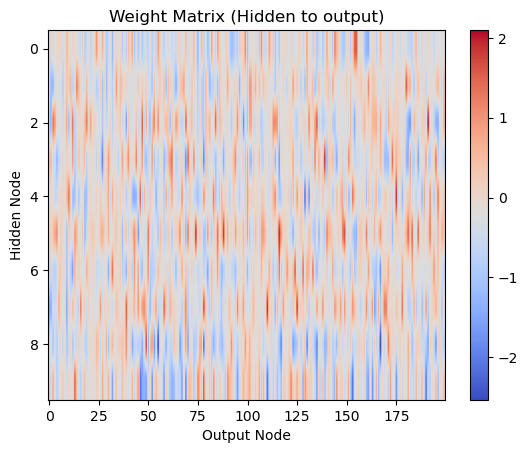

In [43]:
# Visualize weight matrix who
plt.imshow(final_who, cmap='coolwarm', aspect='auto')
plt.xlabel('Output Node')
plt.ylabel('Hidden Node')
plt.title('Weight Matrix (Hidden to output)')
plt.colorbar()
plt.show()

In [44]:
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

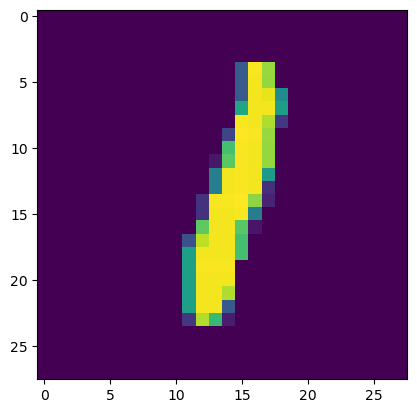

In [45]:
data_serial_num=455
all_values = test_data_list[data_serial_num].split(',') # split()函数将第1条数据进行拆分，以‘，’为分界点进行拆分
inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#print(inputs)
image_array = np.asfarray(all_values[1:]).reshape((28,28)) # asfarray()函数将all_values中的后784个数字进行重新排列
# reshape()函数可以对数组进行整型，使其成为28×28的二维数组，asfarry()函数可以使其成为矩阵。
plt.imshow(image_array, interpolation = 'nearest')  # imshow()函数可以将28×28的矩阵中的数值当做像素值，使其形成图片

In [46]:
test_inputs = np.array(inputs, ndmin = 2).T
# 以下程序为计算输出结果的程序，与上面前向传播算法一致
hidden_inputs = np.dot(final_wih, test_inputs)
hidden_outputs = activation_function(hidden_inputs)
final_inputs = np.dot(final_who, hidden_outputs)
final_outputs = activation_function(final_inputs)
print(final_outputs)

[[8.11342659e-03]
 [9.90784782e-01]
 [5.51454207e-03]
 [8.60659313e-03]
 [1.01403134e-02]
 [5.80039733e-03]
 [3.22923569e-03]
 [1.00295927e-02]
 [8.55807647e-04]
 [1.39305490e-02]]


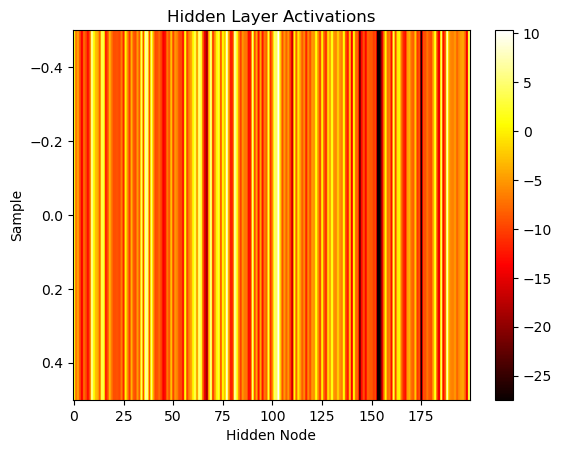

In [47]:
# Visualize hidden layer activations
plt.imshow(hidden_inputs.T, cmap='hot', aspect='auto')
plt.xlabel('Hidden Node')
plt.ylabel('Sample')
plt.title('Hidden Layer Activations')
plt.colorbar()
plt.show()

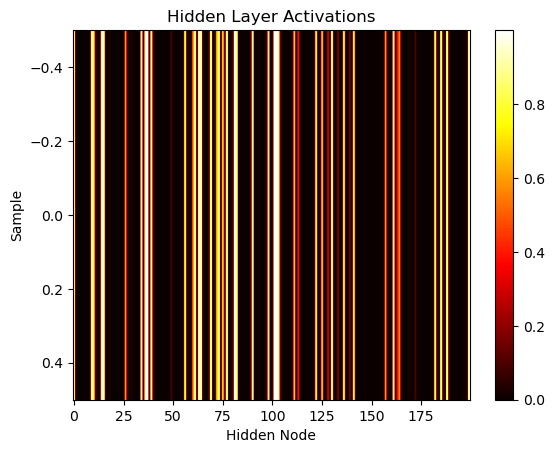

In [48]:
# Visualize hidden layer activations
plt.imshow(hidden_outputs.T, cmap='hot', aspect='auto')
plt.xlabel('Hidden Node')
plt.ylabel('Sample')
plt.title('Hidden Layer Activations')
plt.colorbar()
plt.show()

[[-4.80608847  4.6776411  -5.19483686 -4.74658288 -4.5810443  -5.14401157
  -5.73227534 -4.59213506 -7.06260874 -4.25964259]]


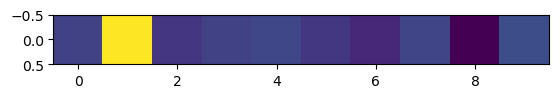

In [49]:
#可视化中间输出
print(final_inputs.T)
middle_layer_fig = np.asfarray((final_inputs-0.01)/0.99*255.0 )  
middle_layer_fig = np.asfarray(middle_layer_fig).reshape((1,10))
plt.imshow(middle_layer_fig, interpolation = 'nearest')

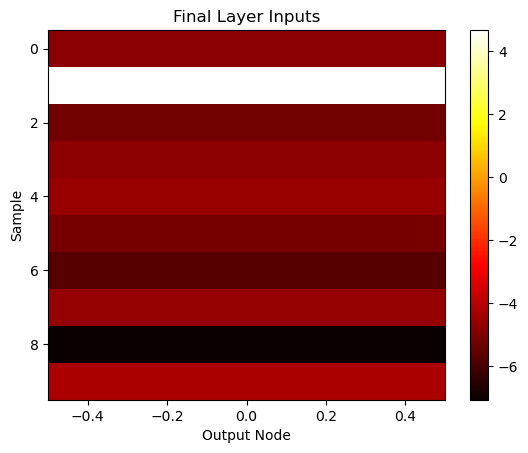

In [50]:
# Or visualize final outputs as a heatmap
plt.imshow(final_inputs, cmap='hot', aspect='auto')
plt.xlabel('Output Node')
plt.ylabel('Sample')
plt.title('Final Layer Inputs')
plt.colorbar()
plt.show()

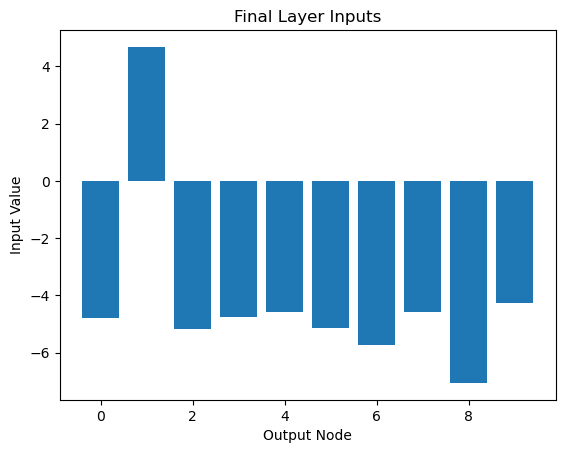

In [51]:
# Visualize final layer inputs
plt.bar(range(out_nodes), final_inputs.flatten())
plt.xlabel('Output Node')
plt.ylabel('Input Value')
plt.title('Final Layer Inputs')
plt.show()

[[8.11342659e-03 9.90784782e-01 5.51454207e-03 8.60659313e-03
  1.01403134e-02 5.80039733e-03 3.22923569e-03 1.00295927e-02
  8.55807647e-04 1.39305490e-02]]


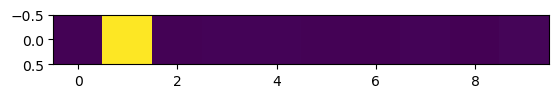

In [52]:
#可视化中间输出
print(final_outputs.T)
middle_layer_fig = np.asfarray((final_outputs-0.01)/0.99*255.0 )  
middle_layer_fig = np.asfarray(middle_layer_fig).reshape((1,10))
plt.imshow(middle_layer_fig, interpolation = 'nearest') 

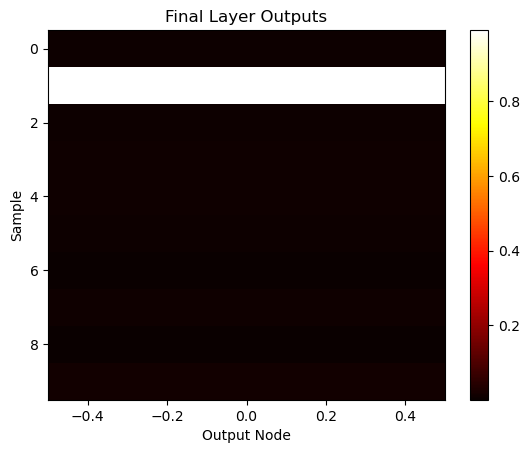

In [53]:
# Or visualize final outputs as a heatmap
plt.imshow(final_outputs, cmap='hot', aspect='auto')
plt.xlabel('Output Node')
plt.ylabel('Sample')
plt.title('Final Layer Outputs')
plt.colorbar()
plt.show()

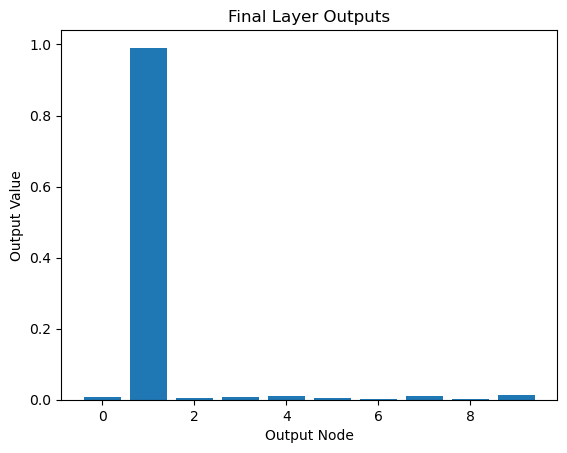

In [54]:
# Visualize final layer outputs （sigmoid）
plt.bar(range(out_nodes), final_outputs.flatten())
plt.xlabel('Output Node')
plt.ylabel('Output Value')
plt.title('Final Layer Outputs')
plt.show()

In [55]:
lebal = np.argmax(final_outputs)
print('final result = ',lebal)

final result =  1


In [56]:
#模型效果和性能测试

In [57]:
# load the mnist test data CSV file into a list
# 导入测试集数据
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
# test the neural network
# 用query函数对测试集进行检测
# go through all the records in the test data set for record in the test_data_list:
scorecard = 0 # 得分卡，检测对一个加一分
# 计算测试集上的误差

for record in test_data_list:
    # split the record by the ',' comas
    # 将所有测试数据通过逗号分隔开
    all_values = record.split(',')
    # correct answer is first value
    # 正确值为每一条测试数据的第一个数值
    correct_lebal = int(all_values[0])
    #print("correct lebal", correct_lebal) # 将正确的数值在屏幕上打印出来
    # scale and shift the inputs
    # 对输入数据进行处理，取后784个数据除以255，再乘以0.99，最后加上0。01，是所有的数据都在0.01到1.00之间
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 #输入层，784个输入
    
    # query the network
    # 用query函数对测试集进行检测
    
    test_inputs = np.array(inputs, ndmin = 2).T
    # 以下程序为计算输出结果的程序，与上面前向传播算法一致
    hidden_inputs = np.dot(final_wih, test_inputs)
    hidden_outputs = activation_function(hidden_inputs)
    final_inputs = np.dot(final_who, hidden_outputs)
    final_outputs = activation_function(final_inputs)
  
    # the index of the highest value corresponds to out label
    # 得到的数字就是输出结果的最大的数值所对应的标签
    lebal = np.argmax(final_outputs) # argmax()函数用于找出数值最大的值所对应的标签
    #print("Output is ", lebal) # 在屏幕上打出最终输出的结果
    # output image of every digit
    # 输出每一个数字的图片
    #image_correct = np.asfarray(all_values[1:]).reshape((28, 28))
    #plt.imshow(image_correct, cmap = 'Greys', interpolation = 'None')
    #plt.show()
    # append correct or incorrect to list
    if (lebal == correct_lebal):
        # network's answer matchs correct answer, add 1 to scorecard
        scorecard += 1
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard += 0
        pass
    pass

# calculate the performance score, the fraction
# 计算准确率 得分卡最后的数值/10000（测试集总个数）
print("performance = ", scorecard / 10000)


performance =  0.9721
